In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [83]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
html = urlopen(url)

In [84]:
soup = BeautifulSoup(html, 'html.parser')

In [85]:
title = soup.title
print(title)

<title>IMDb Top 250 - IMDb</title>


In [86]:
concat_class = []
webpage_links = soup.findAll(True, {'class':['titleColumn', 'ratingColumn']})
#print(webpage_links[5])
import re
clean = re.compile('".*"')
for i in range(0, len(webpage_links), 3):
    str_cells_1 = str(webpage_links[i])
    cleantext1 = BeautifulSoup(str_cells_1, "html.parser").get_text()
    str_cells_2 = str(webpage_links[i+1])
    cleantext2 = BeautifulSoup(str_cells_2, "html.parser").find_all('strong')
    #print(cleantext2)
    str_cells_3 = str(cleantext2)
    cleantext3 =re.search(clean, str_cells_3).group(0)
    #print("ppoo", cleantext3)
    
    concat_class.append([str(cleantext1) + str(cleantext3)])
    #concat_class.append([webpage_links[i], webpage_links[i+1]])

    
print(concat_class[0])

['\n      1.\n      The Shawshank Redemption\n(1994)\n"9.2 based on 2,256,553 user ratings"']


In [87]:
df = pd.DataFrame(concat_class)
df.head()

,0
0,\n 1.\n The Shawshank Redemption\n(1...
1,"\n 2.\n The Godfather\n(1972)\n""9.1 ..."
2,\n 3.\n The Godfather: Part II\n(197...
3,"\n 4.\n The Dark Knight\n(2008)\n""9...."
4,"\n 5.\n 12 Angry Men\n(1957)\n""8.9 b..."


In [88]:
df1 = df[0].str.split('\n', expand=True)
df1[4] = df1[4].str.strip('\"')
df1[1] = df1[1].str.strip('.')
df1[3] = df1[3].str.strip('(').str.strip(')')
df1.head()

,0,1,2,3,4
0,,1,The Shawshank Redemption,1994,"9.2 based on 2,256,553 user ratings"
1,,2,The Godfather,1972,"9.1 based on 1,556,954 user ratings"
2,,3,The Godfather: Part II,1974,"9.0 based on 1,088,182 user ratings"
3,,4,The Dark Knight,2008,"9.0 based on 2,222,776 user ratings"
4,,5,12 Angry Men,1957,"8.9 based on 660,981 user ratings"


In [89]:
df1[4] = df1[4].apply(str)
df1[5] = df1[4].astype(str).str[:3]
df1[6] = df1[4].str.extract(r'on (.*) user');
df1 = df1.drop([4], axis=1)
df1.head()


/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,5,6
0,,1,The Shawshank Redemption,1994,9.2,"2,256,553"
1,,2,The Godfather,1972,9.1,"1,556,954"
2,,3,The Godfather: Part II,1974,9.0,"1,088,182"
3,,4,The Dark Knight,2008,9.0,"2,222,776"
4,,5,12 Angry Men,1957,8.9,"660,981"


In [90]:
my_labels = ["", "Rank", "Title", "Year", "Score", "Num_ratings"]
my_labels

['', 'Rank', 'Title', 'Year', 'Score', 'Num_ratings']

In [91]:
df1.columns = my_labels
df1.tail()

,,Rank,Title,Year,Score,Num_ratings
245,,246,Winter Sleep,2014,8.0,"43,312"
246,,247,Aladdin,1992,8.0,"360,432"
247,,248,PK,2014,8.0,"154,498"
248,,249,Lagaan: Once Upon a Time in India,2001,8.0,"101,255"
249,,250,Swades,2004,8.0,"79,940"


In [92]:
df1["Year"] = df1["Year"].astype(int)
df1["Score"] = df1["Score"].astype(float)
df1["Num_ratings"] = df1["Num_ratings"].str.replace(',', '').astype(int)
df1.head()


,,Rank,Title,Year,Score,Num_ratings
0,,1,The Shawshank Redemption,1994,9.2,2256553
1,,2,The Godfather,1972,9.1,1556954
2,,3,The Godfather: Part II,1974,9.0,1088182
3,,4,The Dark Knight,2008,9.0,2222776
4,,5,12 Angry Men,1957,8.9,660981


In [94]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
               250 non-null object
Rank           250 non-null object
Title          250 non-null object
Year           250 non-null int64
Score          250 non-null float64
Num_ratings    250 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.8+ KB


([<matplotlib.axis.XTick at 0x120fa5e48>],
 <a list of 1 Text xticklabel objects>)

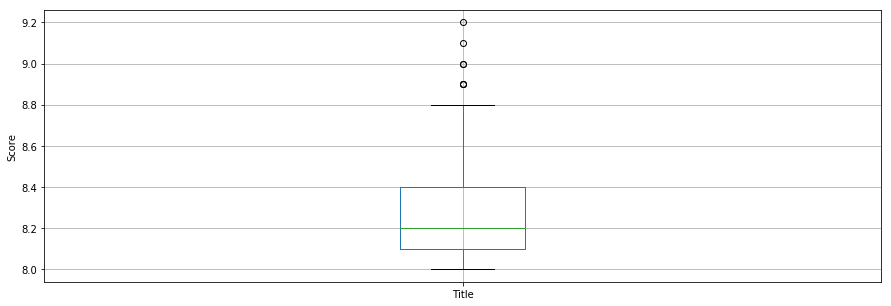

In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df1.boxplot(column='Score')
plt.grid(True, axis='y')
plt.ylabel('Score')
plt.xticks([1], ['Title'])

/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


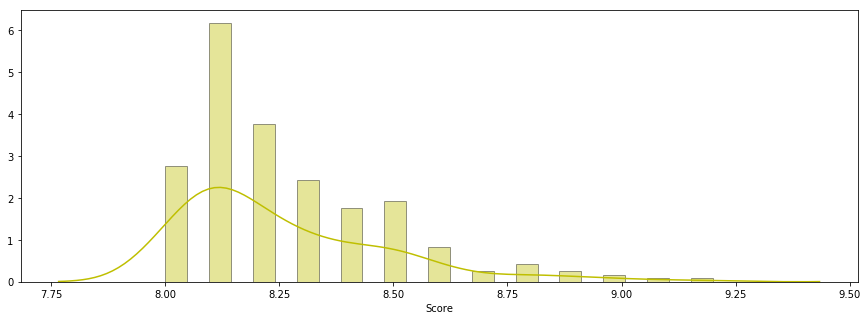

In [108]:
x = df1['Score']
ax = sns.distplot(x, hist=True, kde=True,rug=False, color='y', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


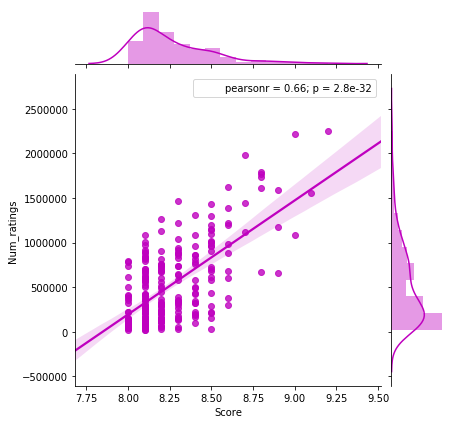

In [110]:
sns.jointplot(data=df1, x='Score', y='Num_ratings', kind='reg', color='m')

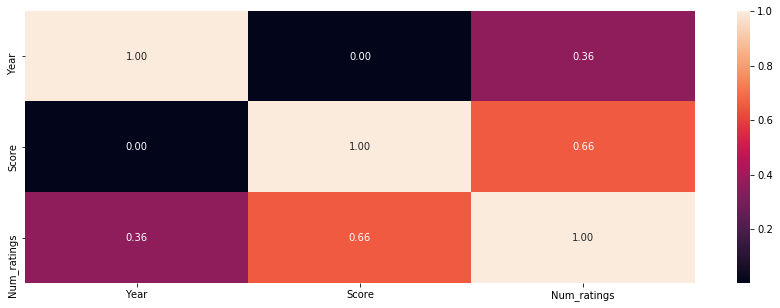

In [111]:
sns.heatmap(df1.corr(), annot=True, fmt=".2f")